In [1]:
# Importing the libraries.
import pandas as pd
import numpy as np 
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading CSV file

df=pd.read_csv('Uber Request Data.csv')

In [3]:
# head of DataFrame.
df.head()

Request id Pickup point  Driver id          Status    Request timestamp  \
0         619      Airport        1.0  Trip Completed      11/7/2016 11:51   
1         867      Airport        1.0  Trip Completed      11/7/2016 17:57   
2        1807         City        1.0  Trip Completed       12/7/2016 9:17   
3        2532      Airport        1.0  Trip Completed      12/7/2016 21:08   
4        3112         City        1.0  Trip Completed  13-07-2016 08:33:16   

        Drop timestamp  
0      11/7/2016 13:00  
1      11/7/2016 18:47  
2       12/7/2016 9:58  
3      12/7/2016 22:03  
4  13-07-2016 09:25:47

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [5]:
#Correcting the data types
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'])
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'])
df.head()


Request id Pickup point  Driver id          Status   Request timestamp  \
0         619      Airport        1.0  Trip Completed 2016-11-07 11:51:00   
1         867      Airport        1.0  Trip Completed 2016-11-07 17:57:00   
2        1807         City        1.0  Trip Completed 2016-12-07 09:17:00   
3        2532      Airport        1.0  Trip Completed 2016-12-07 21:08:00   
4        3112         City        1.0  Trip Completed 2016-07-13 08:33:16   

       Drop timestamp  
0 2016-11-07 13:00:00  
1 2016-11-07 18:47:00  
2 2016-12-07 09:58:00  
3 2016-12-07 22:03:00  
4 2016-07-13 09:25:47

In [6]:
# checking the Dataframe have null values or not.
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [7]:
#  How many observation are present in uber Data request.
df.shape

(6745, 6)

In [8]:
# Request id: A unique identifier of the request of Pickup.

print(df['Pickup point'].unique())


['Airport' 'City']


In [9]:
#  The unique value of Status columns

print(df['Status'].unique())

['Trip Completed' 'Cancelled' 'No Cars Available']


In [10]:
# length of unique value of Request id , Pickup point , Status 
print(len(df['Request id'].unique()))
print(len(df['Pickup point'].unique()))
print(len(df['Status'].unique()))


6745
2
3


In [11]:
# group by on Drop timestamp 
df[(df['Drop timestamp'].isnull())].groupby('Status').size()


Status
Cancelled            1264
No Cars Available    2650
dtype: int64

In [12]:
#Checking if there are any duplicate values
len(df[df.duplicated()].index)

0

### Task 2: Univariate Analysis

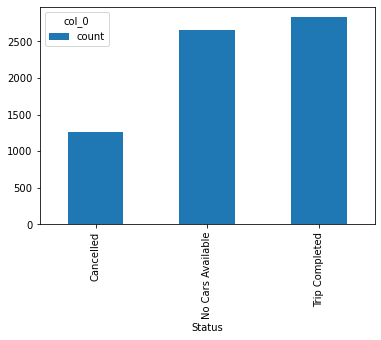

In [13]:
#Univariate analysis on Status column 
status = pd.crosstab(index = df["Status"], columns="count")     
status.plot.bar()
plt.show()

Univariate Analysis conclusion of Status column:
- 'No cars available' is more than the number of trips 'cancelled'.


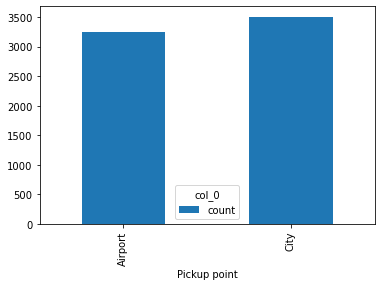

In [14]:
# Pickup point column
pick_point = pd.crosstab(index=df["Pickup point"],columns="count")
pick_point.plot.bar()
plt.show()

Univariate Analysis conclusion of Pickup point column:
- The pickup points "Airport" and "City" are almost equal times present in the dataset.

### Task 3: Bivariate Analysis

In [15]:
# Used Grouping by Status and Pickup point

df.groupby(['Status','Pickup point']).size()

Status             Pickup point
Cancelled          Airport          198
                   City            1066
No Cars Available  Airport         1713
                   City             937
Trip Completed     Airport         1327
                   City            1504
dtype: int64

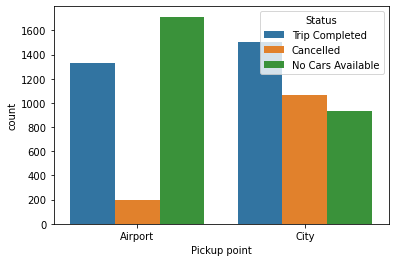

In [16]:
# The count Status and pickup point bivariate analysis.

sns.countplot(x=df['Pickup point'], hue=df['Status'],data=df)
plt.show()

 In Bivariate Analysis conclusion of Status and Pickup point columns:
- There are more No cars available from Airport to City.
- There are more cars Cancelled from City to Airport.

In [17]:
# create new column and convert Request timestamp into hour
df['Request Hour'] = df['Request timestamp'].dt.hour


In [18]:
#Time Slots
df['Request Time Slot'] = 'Early Morning'
df.loc[df['Request Hour'].between(5,8, inclusive=True),'Request Time Slot'] = 'Morning'
df.loc[df['Request Hour'].between(9,12, inclusive=True),'Request Time Slot'] = 'Late Morning'
df.loc[df['Request Hour'].between(13,16, inclusive=True),'Request Time Slot'] = 'Noon'
df.loc[df['Request Hour'].between(17,21, inclusive=True),'Request Time Slot'] = 'Evening'
df.loc[df['Request Hour'].between(21,24, inclusive=True),'Request Time Slot'] = 'Night'

In [19]:
#As Demand can include trips completed, cancelled or no cars available, we will create a column with 1 as a value
df['Demand'] = 1

In [20]:
#As Supply can only be the trips completed, rest all are excluded, so we will create a column with 1 as a supply value trips completed and 0 otherwise.
df['Supply'] = 0
df.loc[(df['Status'] == 'Trip Completed'),'Supply'] = 1


In [21]:
#Demand Supply Gap can be defined as a difference between Demand and Supply
df['Gap'] = df['Demand'] - df['Supply']
df.loc[df['Gap']==0,'Gap'] = 'Trip Completed'
df.loc[df['Gap']==1,'Gap'] = 'Trip Not Completed'

In [22]:
# After checking the Demand and Supply so we can remove them

df = df.drop(['Request Hour' , 'Demand' , 'Supply'], axis=1)

In [23]:
df.head()

Request id Pickup point  Driver id          Status   Request timestamp  \
0         619      Airport        1.0  Trip Completed 2016-11-07 11:51:00   
1         867      Airport        1.0  Trip Completed 2016-11-07 17:57:00   
2        1807         City        1.0  Trip Completed 2016-12-07 09:17:00   
3        2532      Airport        1.0  Trip Completed 2016-12-07 21:08:00   
4        3112         City        1.0  Trip Completed 2016-07-13 08:33:16   

       Drop timestamp Request Time Slot             Gap  
0 2016-11-07 13:00:00      Late Morning  Trip Completed  
1 2016-11-07 18:47:00           Evening  Trip Completed  
2 2016-12-07 09:58:00      Late Morning  Trip Completed  
3 2016-12-07 22:03:00             Night  Trip Completed  
4 2016-07-13 09:25:47           Morning  Trip Completed

### Task 4 - Graphical Analysis

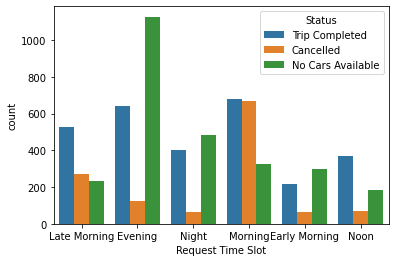

In [24]:
#  To find count of threee Requests according to time slots
sns.countplot(x=df['Request Time Slot'], hue=df['Status'], data = df)
plt.show()

Conclusions from above plot :
- Most "No Cars Available" are in the Evening.
- Most Cancelled trips are in the Morning.

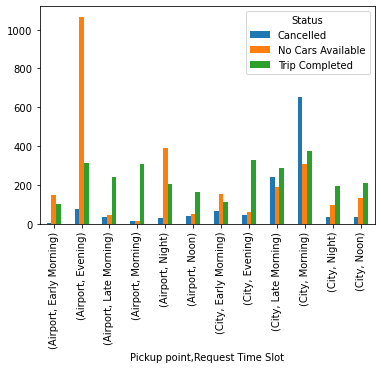

In [25]:
# For finding the Status , according to pickup point and time slot

pickup_df =pd.DataFrame(df.groupby(['Pickup point', 'Request Time Slot','Status'])['Request id'].count().unstack(fill_value=0))
pickup_df.plot.bar()
plt.show()

Conclusions from above plot :
- Most No Cars Available are in the Evening from Airport to City.
- Most Cancelled trips are in the Morning from City to Airport.

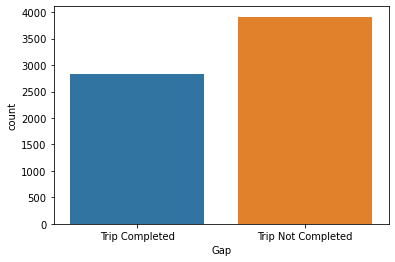

In [26]:
# Ploting on Gap Columns
sns.countplot(x=df['Gap'],data=df)
plt.show()

Conclusions from above plot :
- More Trip not completed than Trip Completed.

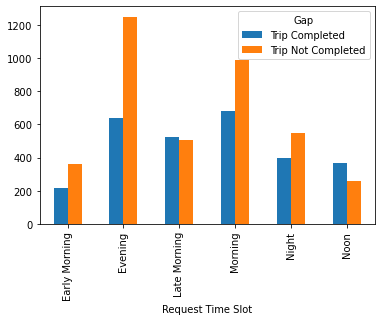

In [27]:
#  Ploting on Gap where Trip is completed and Time slot

gap_time_df=pd.DataFrame(df.groupby(['Request Time Slot','Gap'])['Request id'].count().unstack(fill_value=0))
gap_time_df.plot.bar()
plt.show()

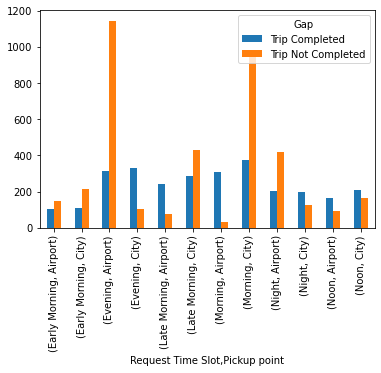

In [28]:
# Ploting on main gap on pickup point and Request id
gap_main = pd.DataFrame(df.groupby(['Request Time Slot','Pickup point','Gap'])['Request id'].count().unstack(fill_value=0))
gap_main.plot.bar()
plt.show()